In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline 

file = '2015_16_Districtwise.csv'
df = pd.read_csv(file)

df_consolidated = pd.read_csv('Consolidated States (1).csv')


In [2]:
df = df[df['OVERALL_LI'].notnull()]
df['STATNAME'] = df['STATNAME'].apply(lambda x: x.lower())
state_lit_series = df.groupby('STATNAME')['OVERALL_LI'].mean()

In [3]:
df_state = df_consolidated.merge(state_lit_series, right_on = 'STATNAME', left_on = 'state', how = 'right' )
display(df_state)


,state,State,Number of Crimes in 2019,Crime: Percent Share of State,Crimes per Lakh,Total Pop (Lakhs),Percent Poverty,Per Capita Net State Domestic Product,Unemployment,Sex Ratio,Income,OVERALL_LI
0,a & n islands,A & n islands,4034,0.1,1013.6,0.0,1.0,107418.0,54.0,876.0,89642.0,83.413333
1,andhra pradesh,Andhra pradesh,145751,2.8,278.6,78.8,9.2,81397.0,12.0,993.0,64773.0,67.373077
2,arunachal pradesh,Arunachal pradesh,2877,0.1,190.9,4.9,34.7,85468.0,17.0,938.0,71366.0,65.330000
3,assam,Assam,123783,2.6,385.8,101.3,32.0,44263.0,45.0,958.0,36320.0,73.204815
4,bihar,Bihar,269109,5.2,224.0,358.2,33.7,31199.0,32.0,918.0,22582.0,63.778947
5,chandigarh,Chandigarh,4518,0.1,381.6,2.4,21.8,156951.0,24.0,818.0,136883.0,86.430000
6,chhattisgarh,Chhattisgarh,96561,1.9,334.7,104.1,39.9,58547.0,8.0,991.0,48366.0,69.218125
7,dadra & nagar haveli,Dadra & Nagar Haveli,290,0.0,52.2,1.4,39.3,NaN,NaN,NaN,NaN,77.650000
8,daman & diu,Daman & Diu,370,0.0,87.5,17.0,9.9,NaN,NaN,NaN,NaN,85.710000
9,delhi,Delhi,316261,5.2,1586.1,0.3,9.9,212219.0,78.0,868.0,161446.0,86.734444


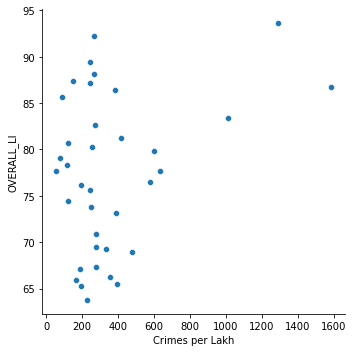

In [4]:
sns.relplot(x = 'Crimes per Lakh', y = 'OVERALL_LI', data = df_state)

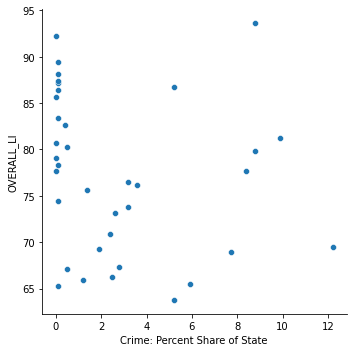

In [5]:
sns.relplot(x = 'Crime: Percent Share of State', y = 'OVERALL_LI', data = df_state)

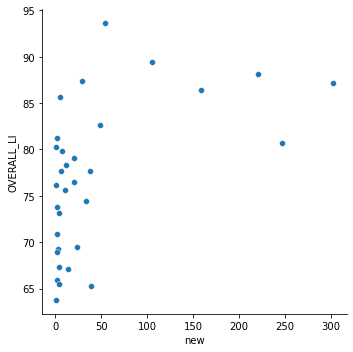

In [6]:
df_state['new'] = df_state['Crimes per Lakh']/df_state['Total Pop (Lakhs)']
mask = df_state['new'] <5000
df_state = df_state[mask]
#display(df_state['new'])
sns.relplot(x = 'new', y = 'OVERALL_LI', data = df_state)

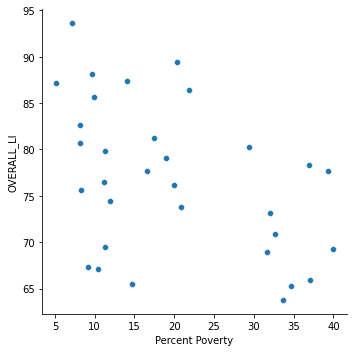

In [7]:
sns.relplot(x = 'Percent Poverty', y = 'OVERALL_LI', data = df_state)

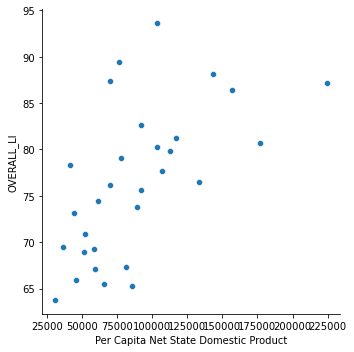

In [8]:
sns.relplot(x = 'Per Capita Net State Domestic Product', y = 'OVERALL_LI', data = df_state)

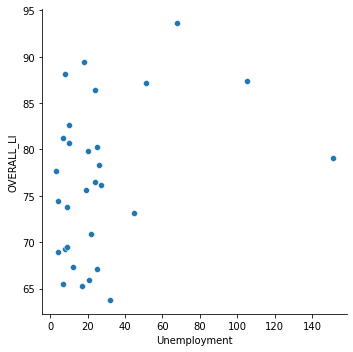

In [9]:
sns.relplot(x = 'Unemployment', y = 'OVERALL_LI', data = df_state)

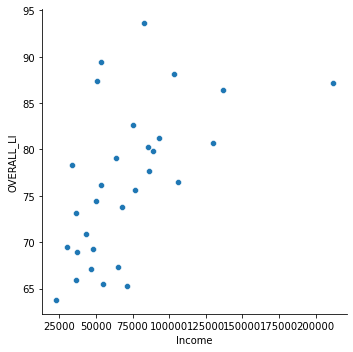

In [10]:
sns.relplot(x = 'Income', y = 'OVERALL_LI', data = df_state)

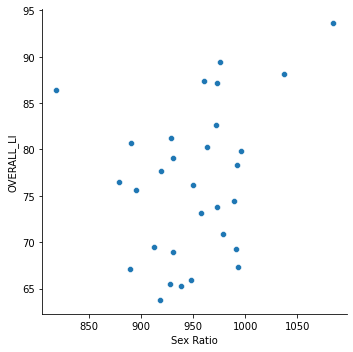

In [11]:
sns.relplot(x = 'Sex Ratio', y = 'OVERALL_LI', data = df_state)

In [19]:
df_state = df_state[df_state['Percent Poverty'].notnull()]
df_state = df_state[df_state['Income'].notnull()]
df_state = df_state[df_state['Per Capita Net State Domestic Product'].notnull()]
df_state = df_state[df_state['Unemployment'].notnull()]
df_state = df_state[df_state['Sex Ratio'].notnull()]


df_state['Percent Poverty'].values

array([ 9.2, 34.7, 32. , 33.7, 21.8, 39.9,  5.1, 16.6, 11.2,  8.1, 10.4,
       37. , 20.9,  7.1, 31.7, 17.4, 36.9, 11.9, 20.4, 18.9, 32.6,  9.7,
        8.3, 14.7,  8.2, 11.3, 14.1, 11.3, 29.4, 20. ])

In [13]:
df_state['Income'].values

array([ 64773.,  71366.,  36320.,  22582., 136883.,  48366., 211570.,
        85979., 106320.,  75185.,  46734.,  36554.,  68053.,  82753.,
        37180.,  93282.,  33695.,  50316.,  53624.,  63781.,  43463.,
       103149.,  76895.,  54637., 130127.,  89050.,  50859.,  30021.,
        85372.,  53383.])

In [14]:

df_state['Per Capita Net State Domestic Product'].values

array([ 81397.,  85468.,  44263.,  31199., 156951.,  58547., 224138.,
       106831., 133427.,  92300.,  59279.,  46131.,  89545., 103820.,
        51798., 117091.,  41573.,  61548.,  76120.,  77529.,  52559.,
       143677.,  92350.,  65974., 176491., 112664.,  69705.,  36250.,
       103716.,  70059.])

In [15]:

df_state['Unemployment'].values

array([ 12.,  17.,  45.,  32.,  24.,   8.,  51.,   3.,  24.,  10.,  25.,
        21.,   9.,  68.,   4.,   7.,  26.,   4.,  18., 151.,  22.,   8.,
        19.,   7.,  10.,  20., 105.,   9.,  25.,  27.])

In [16]:

df_state['Sex Ratio'].values

array([ 993.,  938.,  958.,  918.,  818.,  991.,  973.,  919.,  879.,
        972.,  889.,  948.,  973., 1084.,  931.,  929.,  992.,  989.,
        976.,  931.,  979., 1037.,  895.,  928.,  890.,  996.,  960.,
        912.,  963.,  950.])

In [17]:
df_state['OVERALL_LI'].values

array([67.37307692, 65.33      , 73.20481481, 63.77894737, 86.43      ,
       69.218125  , 87.19      , 77.62730769, 76.46095238, 82.675     ,
       67.08636364, 65.88583333, 73.79833333, 93.64857143, 68.9784    ,
       81.20485714, 78.32555556, 74.39428571, 89.43625   , 79.10818182,
       70.84407407, 88.1425    , 75.616     , 65.50727273, 80.7025    ,
       79.84833333, 87.3575    , 69.4871831 , 80.29230769, 76.1305    ])